## **Import Libraries**

In [ ]:
import torch
from torch import nn
from torch import optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# **1. Prepare Data**

### **Make Data Set**

In [ ]:
# Make Data Set
X, y = make_circles(n_samples = 1000,
                    noise = 0.03,
                    shuffle=True,
                    random_state = 42,
                    factor=0.8)
X_sample = X[0]
y_sample = y[0]
# Shape and Length
print(f'The number of inputs: {len(X)} | Input Data shape: {X.shape} | Input Sample Shape: {X_sample.shape}')
print(f'The number of outputs: {len(y)} | Output Data shape: {y.shape} | Output Sample Shape: {y_sample.shape}')

The number of inputs: 1000 | Input Data shape: (1000, 2) | Input Sample Shape: (2,)
The number of outputs: 1000 | Output Data shape: (1000,) | Output Sample Shape: ()


### **About Code** `.make_circles()`
###### **Definition**:
Make a large circle containing a smaller circle in 2d.
###### **Syntax**:
`sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)`
###### **Parameters**:
- `n_samples`: Number of data
- `shuffle`: `True` or `False`
- `noise`: Standard deviation of Gaussian noise added to the data.
- `factor`: Scale factor between inner and outer circle in the range `[0, 1)`


In [ ]:
# Visualize
print(f'The First 5 Inputs: {X[:5]}')
print(f'The first 5 Outputs: {y[:5]}')

The First 5 Inputs: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
The first 5 Outputs: [1 1 1 1 0]


In [ ]:
# Make Data Frame
circles = pd.DataFrame({'X1':X[:,0],
                        'X2':X[:,1],
                        'labels': y})
circles

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
# Counting
count = circles['labels'].value_counts()
count

,count
labels,
1,500
0,500


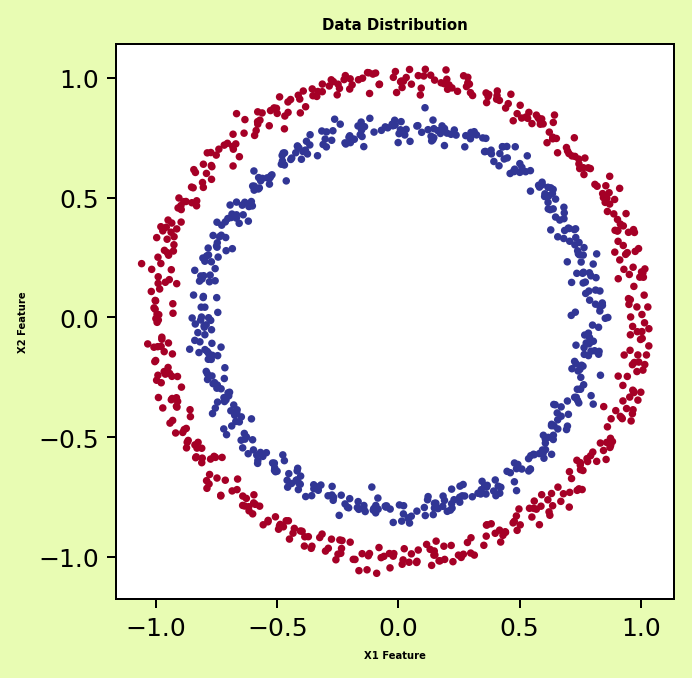

In [ ]:
# Visualize
plt.figure(figsize = (4,4), dpi = 180, facecolor = '#e8fcb3')

plt.xlabel('X1 Feature', size=4, weight='bold')
plt.ylabel('X2 Feature', size=4, weight='bold')
plt.title('Data Distribution', size=6, weight='bold')

plt.scatter(X[:,0], X[:,1], c=y, s=4, cmap=plt.cm.RdYlBu)
plt.show()

### **Turn Data into Tensor (Encoding)**

In [ ]:
# Type of Data
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# Turn to Tensor
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

print(f'Input Type: {type(X)}, {X.dtype} | Output Type: {type(y)}, {y.dtype}')


Input Type: <class 'torch.Tensor'>, torch.float32 | Output Type: <class 'torch.Tensor'>, torch.float32


### **Split Data into Training and Test Sets(Randomly)**

In [ ]:
torch.manual_seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

print(f'Numbers of Train Data: {len(X_train)}/{len(X)} | Numbers of Test Data: {len(X_test)}/{len(y)}')

Numbers of Train Data: 800/1000 | Numbers of Test Data: 200/1000


### **About Code**
### **`.train_test_split()`**
###### **Definition**:
Split arrays or matrices into random train and test subsets.
###### **Syntax**:
`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`
###### **Parameters**:
- `arrays`: sequence of indexables with same length / shape[0]
- `shuffle`: `True` or `False`. Whether or not to shuffle the data before splitting.
- `test_size`: Number of test samples



# **2. Build a Model**

### **Make Device Agnostic Code**



In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### **Construct a Model (`with nn.Module`)**

In [ ]:
# Construct a model class
torch.manual_seed(42)
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers
    self.layer_1 = nn.Linear(in_features = 2, out_features= 5)
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

# Create an Instance of Model
model_0 = CircleModel()
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

### **Construct a Model (`with nn.Sequential`)**

In [ ]:
# Replicate CircleModel with nn.Sequential
torch.manual_seed(42)
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

# Instance an Model
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

### **Make Predictions (with untrained Models)**

In [ ]:
torch.manual_seed(42)
with torch.inference_mode():
  untrained_preds_0 = model_0(X_test.to(device))
  untrained_preds_1 = model_1(X_test.to(device))


print("Length of predictions:")
print(f' model_0: {len(untrained_preds_0)} | model_1: {len(untrained_preds_1)}')
print('Shape of predictions:')
print(f' model_0: {untrained_preds_0.shape} | model_1: {untrained_preds_1.shape}')
print('First 10 predictions:')
print(f' model_0: {untrained_preds_0[:10]} | model_1: {untrained_preds_1[:10]}')
print('First 10 test labels:')
print(f' model_0: {y_test[:10]} | model_1: {y_test[:10]}')

Length of predictions:
 model_0: 200 | model_1: 200
Shape of predictions:
 model_0: torch.Size([200, 1]) | model_1: torch.Size([200, 1])
First 10 predictions:
 model_0: tensor([[-0.1960],
        [-0.0997],
        [-0.0874],
        [-0.1269],
        [-0.1163],
        [-0.1707],
        [-0.1067],
        [-0.2055],
        [-0.1151],
        [-0.1871]]) | model_1: tensor([[-0.1960],
        [-0.0997],
        [-0.0874],
        [-0.1269],
        [-0.1163],
        [-0.1707],
        [-0.1067],
        [-0.2055],
        [-0.1151],
        [-0.1871]])
First 10 test labels:
 model_0: tensor([0., 1., 0., 1., 1., 1., 1., 0., 0., 1.]) | model_1: tensor([0., 1., 0., 1., 1., 1., 1., 0., 0., 1.])


In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('layer_2.bias', tensor([-0.2060]))])

In [ ]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('0.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('1.bias', tensor([-0.2060]))])

## **Loss Function & Optimizer**

In [ ]:
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(params=model_0.parameters(),
                      lr = 0.01)

## **Calculate Accuracy**

In [ ]:
def accuracy_function(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  accuracy = correct/len(y_pred) * 100
  return accuracy

### **About Code**
### **`torch.eq()`**
###### **Definition**:

`torch.eq()` is a function in PyTorch that performs element-wise equality comparison between two tensors. It returns a tensor of the same shape as the input tensors, where each element is True (or 1) if the corresponding elements in the input tensors are equal, and False (or 0) if they are not.

### **Note**:
### **`Raw Logits` -> `Prediction Probabilities`** Using Activation Functions
### **`Prediction Probabilities` -> `Prediction Labels`** Using `argmax()`     



In [ ]:
# Logits
torch.manual_seed(42)
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits[:5], y_test[:5]

(tensor([[-0.1960],
         [-0.0997],
         [-0.0874],
         [-0.1269],
         [-0.1163]]),
 tensor([0., 1., 0., 1., 1.]))

In [ ]:
# Prediction Probablities ---> Sigmoid Activation Function
y_pred_probs =  torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.4511],
        [0.4751],
        [0.4782],
        [0.4683],
        [0.4710]])

### **Note**:
For our predictions probabilities, we need to perform a range-style rounding on them. In this case:
##### if `y_pred_probs` >= **0.5** ---> `y=1`
##### if `y_pred_probs` < **0.5** ---> `y=0`

In [ ]:
# Prediction Labels
y_pred = torch.round(y_pred_probs)
y_pred[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [ ]:
# In Full (logits -> Prediction Probs -> Prediction Labels)
y_pred = torch.round(torch.sigmoid(model_0(X_test.to(device))))
y_pred[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<SliceBackward0>)

### **About Code**
### **`torch.round()`**
###### In PyTorch, `torch.round()` is a function that rounds each element of a tensor to the nearest integer. It works element-wise, meaning it operates on each value in the tensor independently.

In [ ]:
# Get rid of extra dimension
y_pred.squeeze()[:5]

tensor([0., 0., 0., 0., 0.], grad_fn=<SliceBackward0>)

### **Training and Testing Loop**


In [ ]:
# Set a manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data into target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 150
# Loss Values
train_loss_values = []
test_loss_values = []
# Accuracy Values
train_acc_values = []
test_acc_values = []

# Looooop
for epoch in range(epochs):

  # Training
  model_0.train()
  # Forward Pass
  y_logits = model_0(X_train).squeeze()
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)
  # Calculate The Loss/Accuracy
  loss = loss_function(y_logits, y_train)  # nn.BCEWithLogitsLoss() expects raw logits as input
  accuracy = accuracy_function(y_true=y_train,
                               y_pred = y_pred)
  # Optimizer Zero Gradient
  optimizer.zero_grad()
  # Backward Pass(Propagation)
  loss.backward()
  # Optimizer do well step by step
  optimizer.step()

   # Testing
  model_0.eval()
   # Forward Pass
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred_probs = torch.sigmoid(test_logits)
    test_pred = torch.round(test_pred_probs)
  # Calculate Loss/Accuracy
  test_loss = loss_function(test_pred, y_test)
  test_accuracy = accuracy_function(y_true=y_test,
                                    y_pred=test_pred)

  # Print What Happened
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f} | Acc: {accuracy:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_accuracy:.2f}')





Epoch: 0 | Loss: 0.69599 | Acc: 49.75 | Test Loss: 0.69315 | Test Acc: 51.00
Epoch: 10 | Loss: 0.69570 | Acc: 49.75 | Test Loss: 0.69315 | Test Acc: 51.00
Epoch: 20 | Loss: 0.69544 | Acc: 49.75 | Test Loss: 0.69315 | Test Acc: 51.00
Epoch: 30 | Loss: 0.69520 | Acc: 49.75 | Test Loss: 0.69315 | Test Acc: 51.00
Epoch: 40 | Loss: 0.69499 | Acc: 49.75 | Test Loss: 0.69315 | Test Acc: 51.00
Epoch: 50 | Loss: 0.69480 | Acc: 49.75 | Test Loss: 0.69315 | Test Acc: 51.00
Epoch: 60 | Loss: 0.69462 | Acc: 49.75 | Test Loss: 0.69315 | Test Acc: 51.00
Epoch: 70 | Loss: 0.69447 | Acc: 49.75 | Test Loss: 0.69315 | Test Acc: 51.00
Epoch: 80 | Loss: 0.69432 | Acc: 49.75 | Test Loss: 0.69315 | Test Acc: 51.00
Epoch: 90 | Loss: 0.69420 | Acc: 49.75 | Test Loss: 0.69315 | Test Acc: 51.00
Epoch: 100 | Loss: 0.69408 | Acc: 49.75 | Test Loss: 0.69935 | Test Acc: 50.00
Epoch: 110 | Loss: 0.69397 | Acc: 47.12 | Test Loss: 0.72105 | Test Acc: 46.50
Epoch: 120 | Loss: 0.69388 | Acc: 43.25 | Test Loss: 0.73966 | 

### **Make Predictions and Evaluate Model**

In [ ]:
# Import a Function Called "plot_decision_boundary"
import requests
from pathlib import Path
# Download helper functions
if Path('helper_functions.py').is_file():
  print('File already exists')
else:
  print('Downloading helper_functions.py ....')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)
# Import the function
from helper_functions import plot_predictions, plot_decision_boundary

File already exists


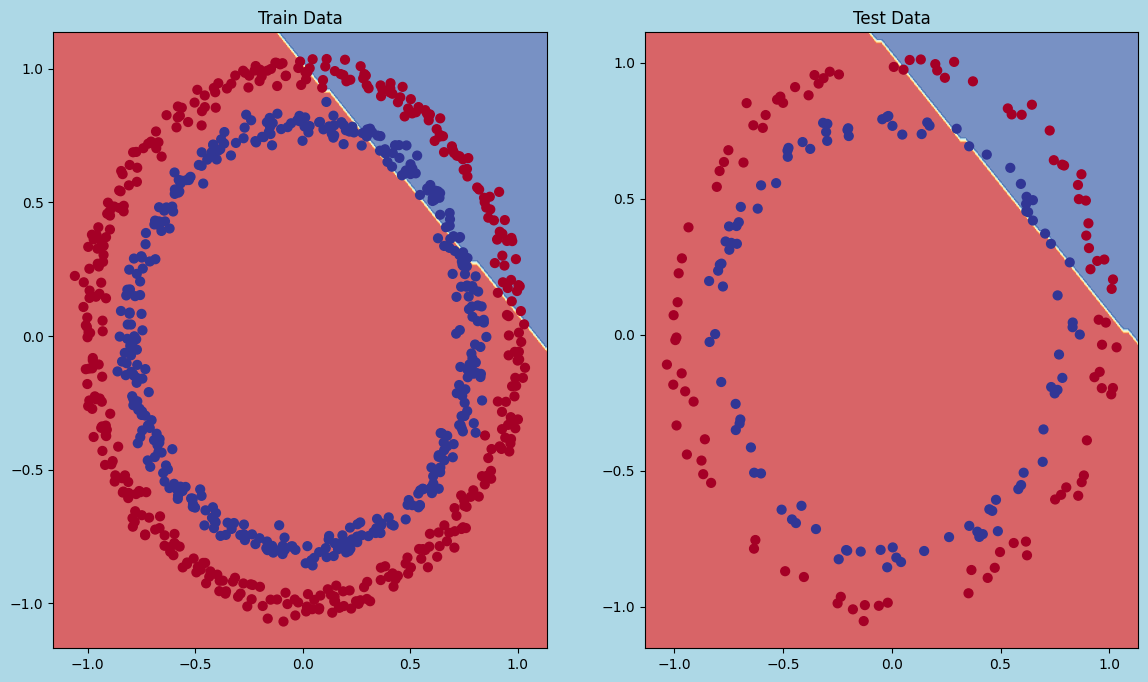

In [ ]:
# Plot decision boundary of model
plt.figure(figsize=(14,8), facecolor='lightblue')
plt.subplot(1,2,1)
plt.title('Train Data')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test Data')
plot_decision_boundary(model_0, X_test, y_test)

### **About Code**
### **`plt.subplot()`**
###### **Definition**:
In Matplotlib, `plt.subplot()` is a function used to create a grid of subplots within a figure. It allows you to display multiple plots in a single window by specifying the number of rows and columns, as well as the index of the subplot you're working on.
###### **Syntax**:
     plt.subplot(nrows, ncols, index)
###### **Parameters**:
* `nrows`: The number of rows in the subplot grid.
* `ncols`: The number of columns in the subplot grid.
* `index`: The index of the current subplot (starting from 1). The index specifies the position of the subplot in the grid.


### **Improve Model**
###### **Common Ways**:
1. Adding layer
2. Increase the number of hidden units
3. Change/Add activation function
4. Change the optimization function
5. Change the learning rate
6. Fit for longer

In [ ]:
# Add layer: 2 -> 3
# Increase Hidden Units: 5 -> 10
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))
model_V1 = CircleModelV1()
model_V1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss Function
loss_function = nn.BCEWithLogitsLoss()
# Optimizer
optimizer = optim.SGD(params=model_V1.parameters(),
                      lr =0.1)

In [ ]:
# Set the manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data into target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Counts
epochs = 1000
epoch_count = []
train_loss_values = []
train_acc_values = []
test_loss_values = []
test_acc_values = []

# Loooops
for epoch in range(epochs):

  # Train Looop
  model_V1.train()
  # Forward Pass
  y_logits = model_V1(X_train).squeeze()
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)
  # Calculate Loss/Acc
  loss = loss_function(y_logits, y_train)
  acc = accuracy_function(y_true=y_train,
                          y_pred=y_pred)
  # Optimizer Zero Gradient
  optimizer.zero_grad()
  # Backward Pass
  loss.backward()
  # Optimizer does well step by step (Gradient Descent)
  optimizer.step()

  # Test Looop
  model_V1.eval()
  # Forward Pass
  with torch.inference_mode():
    test_logits = model_V1(X_test).squeeze()
    test_pred_probs = torch.sigmoid(test_logits)
    test_pred = torch.round(test_pred_probs)
  # Calculate The Loss/Acc
  test_loss = loss_function(test_logits, y_test)
  test_acc = accuracy_function(y_true=y_test,
                               y_pred=test_pred)

  # Print What Happened!
  if epoch % 50 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}')



Epoch: 0 | Loss: 0.69418 | Acc: 49.88 | Test Loss: 0.69175 | Test Acc: 55.00
Epoch: 50 | Loss: 0.69322 | Acc: 50.38 | Test Loss: 0.69309 | Test Acc: 54.00
Epoch: 100 | Loss: 0.69299 | Acc: 51.75 | Test Loss: 0.69409 | Test Acc: 49.50
Epoch: 150 | Loss: 0.69293 | Acc: 51.88 | Test Loss: 0.69467 | Test Acc: 46.00
Epoch: 200 | Loss: 0.69291 | Acc: 51.75 | Test Loss: 0.69499 | Test Acc: 45.00
Epoch: 250 | Loss: 0.69291 | Acc: 51.62 | Test Loss: 0.69517 | Test Acc: 45.00
Epoch: 300 | Loss: 0.69291 | Acc: 51.50 | Test Loss: 0.69526 | Test Acc: 45.00
Epoch: 350 | Loss: 0.69291 | Acc: 51.62 | Test Loss: 0.69531 | Test Acc: 45.00
Epoch: 400 | Loss: 0.69291 | Acc: 51.62 | Test Loss: 0.69534 | Test Acc: 45.00
Epoch: 450 | Loss: 0.69291 | Acc: 51.62 | Test Loss: 0.69535 | Test Acc: 45.00
Epoch: 500 | Loss: 0.69291 | Acc: 51.62 | Test Loss: 0.69536 | Test Acc: 45.00
Epoch: 550 | Loss: 0.69291 | Acc: 51.50 | Test Loss: 0.69537 | Test Acc: 45.50
Epoch: 600 | Loss: 0.69291 | Acc: 51.38 | Test Loss: 0.

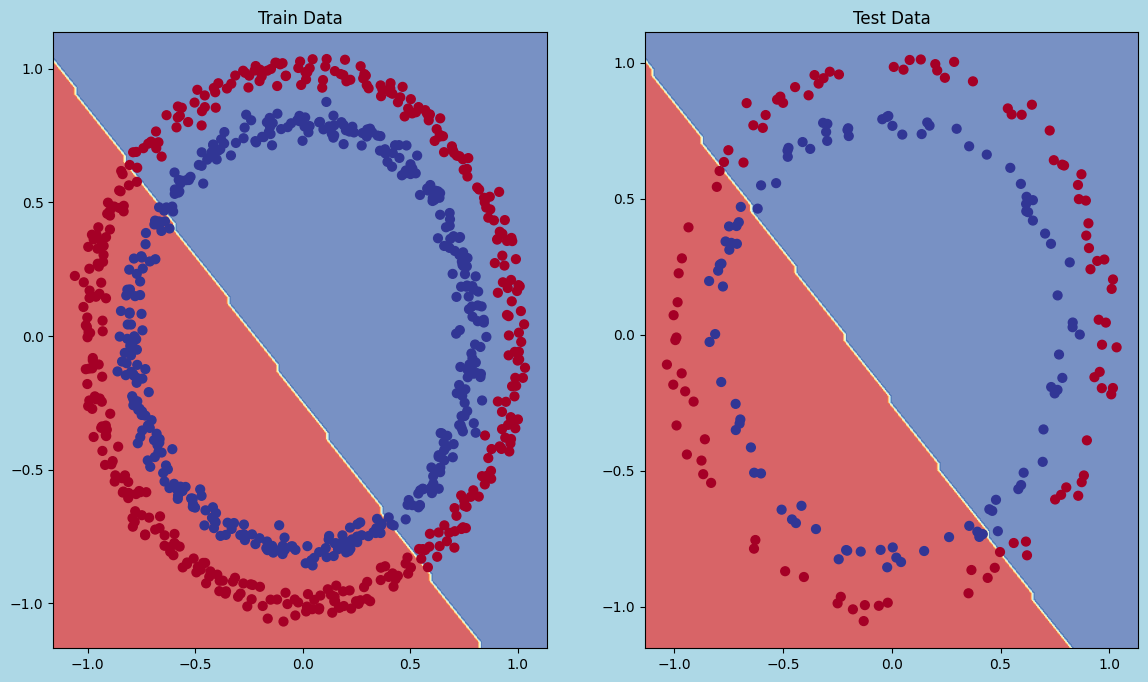

In [ ]:
# Visualize
# Plot decision boundary of model
plt.figure(figsize=(14,8), facecolor='lightblue')
plt.subplot(1,2,1)
plt.title('Train Data')
plot_decision_boundary(model_V1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test Data')
plot_decision_boundary(model_V1, X_test, y_test)

### **Preparing data to see if our model can fit a straight line**

In [ ]:
# Create Data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Split Data
train_split = int(0.8 * len(X_regression))
# Training Data
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
# Test Data
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]
# Print
print(f' Train Input Data: {len(X_train_regression)} | Train Label Data: {len(y_train_regression)} | Test Input Data: {len(X_test_regression)} | Test Label Data: {len(y_test_regression)}   ')

 Train Input Data: 80 | Train Label Data: 80 | Test Input Data: 20 | Test Label Data: 20   


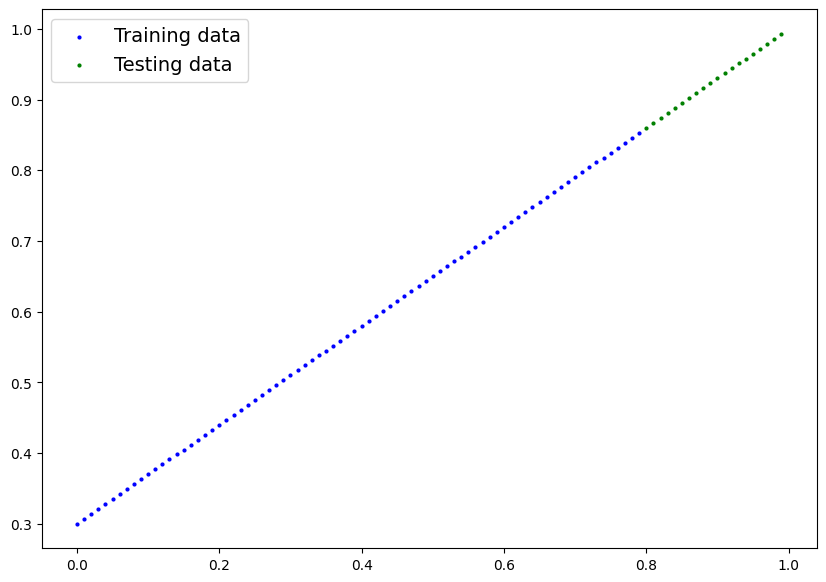

In [ ]:
# Visualize
plot_predictions(X_train_regression,
                 y_train_regression,
                 X_test_regression,
                 y_test_regression)

In [ ]:
# Set a manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Model
model_V2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features =1)
).to(device)

model_V2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss Function
loss_func = nn.L1Loss()
# Optimizer
opt_func = optim.SGD(params=model_V2.parameters(),
                     lr = 0.01)

In [ ]:
# Loops
# Set a manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data into target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Counts
epochs = 1000
epoch_count = []
train_loss_values = []
train_acc_values = []
test_loss_values = []
test_acc_values = []

for epoch in range(epochs):
  #Train
  model_V2.train()
  # Forward Pass
  y_pred_regression = model_V2(X_train_regression)
  # Loss
  loss_reg = loss_func(y_pred_regression, y_train_regression)
  acc_reg = accuracy_function(y_true=y_train_regression,
                              y_pred=y_pred_regression)
  # Zero Grad
  opt_func.zero_grad()
  # Backward
  loss_reg.backward()
  # Optimizer does well step by Step
  opt_func.step()

  # Test
  model_V2.eval()
  with torch.inference_mode():
    y_test_pred_reg = model_V2(X_test_regression)
  test_loss_reg = loss_func(y_test_pred_reg, y_test_regression)
  test_acc_reg = accuracy_function(y_true= y_test_regression,
                                   y_pred = y_test_pred_reg)

  # What is Happening
  if epoch % 50 ==0:
    print(f'Epoch: {epoch} | Loss: {loss_reg:.5f} | Test Loss: {test_loss_reg:.5f}')





Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 50 | Loss: 0.03196 | Test Loss: 0.00108
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 150 | Loss: 0.02744 | Test Loss: 0.00169
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 250 | Loss: 0.02331 | Test Loss: 0.00254
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 350 | Loss: 0.01926 | Test Loss: 0.00359
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 450 | Loss: 0.01937 | Test Loss: 0.00327
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 550 | Loss: 0.01919 | Test Loss: 0.00380
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 650 | Loss: 0.01889 | Test Loss: 0.00378
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 750 | Loss: 0.01845 | Test Loss: 0.00320
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 850 | Loss: 0.01773 | Test Loss: 0.00282
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360
Epoch: 950 | Loss: 0.01776 | Test Loss: 0.00310


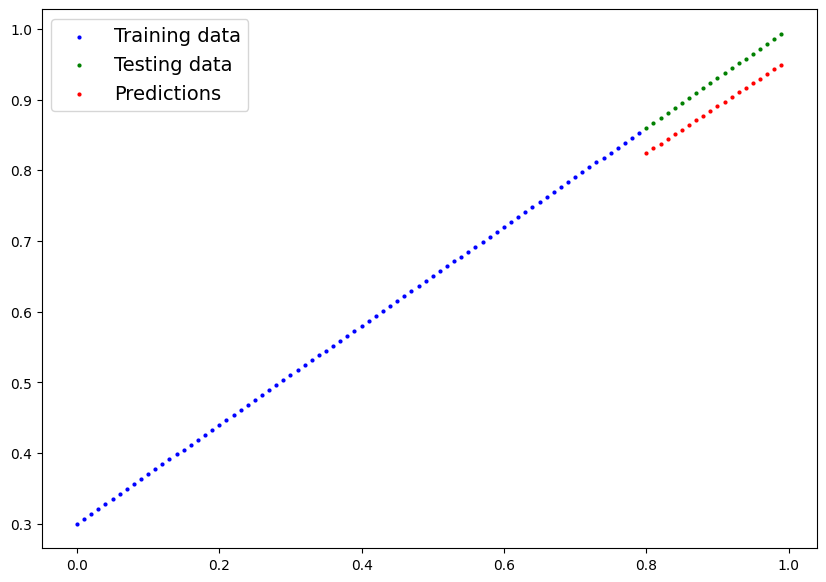

In [ ]:
# Make Predictions
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_V2.eval()
with torch.inference_mode():
  y_preds = model_V2(X_test_regression)
plot_predictions(X_train_regression,
                 y_train_regression,
                 X_test_regression,
                 y_test_regression,
                 y_preds)

### **Build a Model With Non-Linearity Activation Function**

In [ ]:
class CircleModelN1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()
  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_N1 = CircleModelN1()
model_N1

CircleModelN1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Loss Function
loss_function = nn.BCEWithLogitsLoss()
# Optimizer
optimizer = optim.SGD(params = model_N1.parameters(),
                      lr = 0.001)

In [ ]:
# Set Manual Seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put the data in target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# count
epochs = 6000
epoch_count = []
train_loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []

for epoch in range(epochs):
  # Training Loop
  model_N1.train()
  # Forward Pass
  y_logits = model_N1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # Claculate Loss/Accuracy
  loss = loss_function(y_logits, y_train)
  acc = accuracy_function(y_true = y_train,
                          y_pred = y_pred)
  # Optimizer Zero Gradient
  optimizer.zero_grad()
  # Backward Pass
  loss.backward()
  # Optimizer does well step by step (Gradient Descent)
  optimizer.step()

  # Test Loop
  model_N1.eval()
  # Forward Pass
  with torch.inference_mode():
    test_logits = model_N1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
  # Calculate Loss/Accuracy
  test_loss = loss_function(test_logits, y_test)
  test_acc = accuracy_function(y_true = y_test,
                               y_pred = test_pred)

  # What's Happening?
  if epoch % 50 == 0:
    train_loss_values.append(loss.detach().numpy())
    train_acc_values.append(acc)
    test_loss_values.append(test_loss.detach().numpy())
    test_acc_values.append(test_acc)
    epoch_count.append(epoch)
    print(f' Epoch: {epoch} | loss: {loss} | acc: {acc} | test loss: {test_loss} | test acc: {test_acc}')

 Epoch: 0 | loss: 0.6930062770843506 | acc: 50.24999999999999 | test loss: 0.6930113434791565 | test acc: 49.0
 Epoch: 50 | loss: 0.6929828524589539 | acc: 50.24999999999999 | test loss: 0.6929770708084106 | test acc: 49.0
 Epoch: 100 | loss: 0.6929585337638855 | acc: 50.24999999999999 | test loss: 0.6929416060447693 | test acc: 49.0
 Epoch: 150 | loss: 0.6929340362548828 | acc: 50.24999999999999 | test loss: 0.6929057240486145 | test acc: 49.0
 Epoch: 200 | loss: 0.6929095387458801 | acc: 50.24999999999999 | test loss: 0.6928697228431702 | test acc: 49.0
 Epoch: 250 | loss: 0.6928855180740356 | acc: 50.24999999999999 | test loss: 0.6928353905677795 | test acc: 49.0
 Epoch: 300 | loss: 0.692861020565033 | acc: 50.24999999999999 | test loss: 0.6928015947341919 | test acc: 49.0
 Epoch: 350 | loss: 0.6928362846374512 | acc: 50.24999999999999 | test loss: 0.6927670240402222 | test acc: 49.0
 Epoch: 400 | loss: 0.6928113698959351 | acc: 50.24999999999999 | test loss: 0.6927326321601868 | te

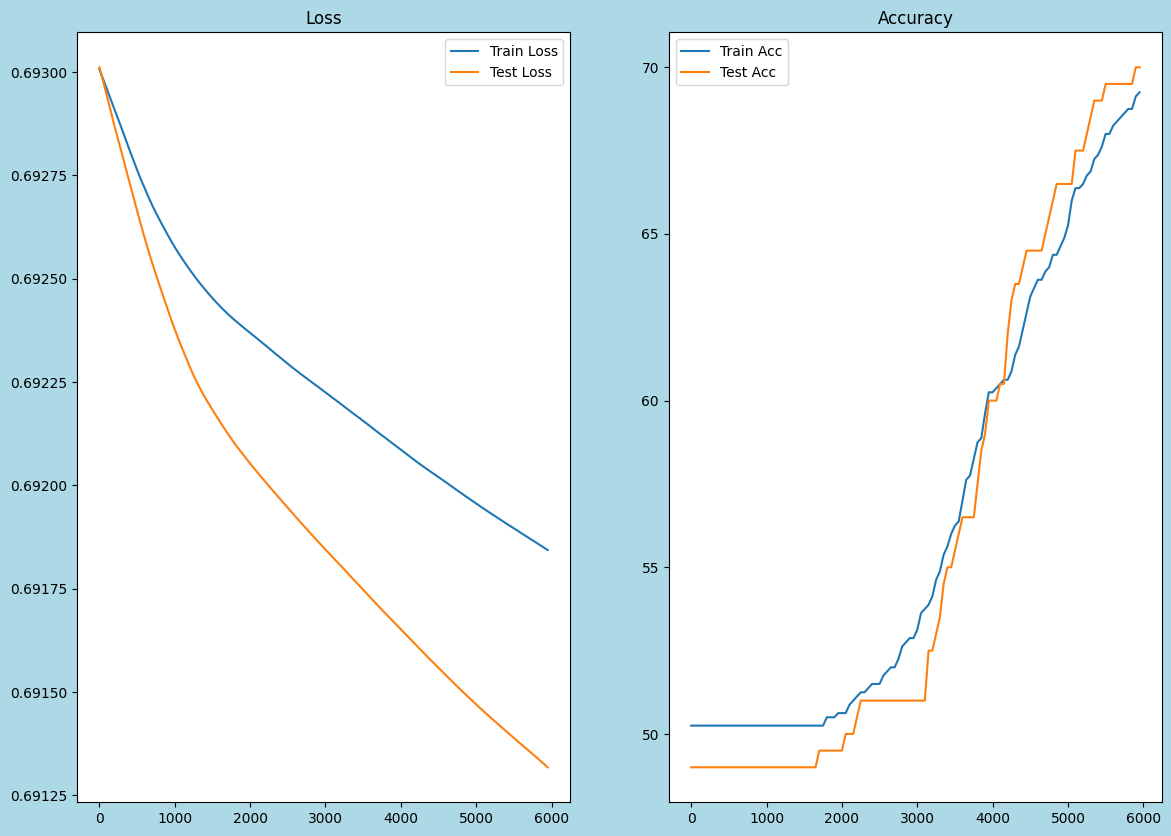

In [ ]:
# Visualize Loss and Accuracy Changes
plt.figure(figsize=(14,10), facecolor='lightblue')
plt.subplot(1,2,1)
plt.plot(epoch_count, train_loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epoch_count, train_acc_values, label='Train Acc')
plt.plot(epoch_count, test_acc_values, label='Test Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

### **Make Predictions**

In [ ]:
model_N1.eval()
with torch.inference_mode():
  y_logitss = model_N1(X_test).squeeze()
  y_predss = torch.round(torch.sigmoid(y_logitss))
y_predss[:10], y_test[:10]

(tensor([1., 1., 0., 1., 1., 1., 1., 1., 1., 1.]),
 tensor([0., 1., 0., 1., 1., 1., 1., 0., 0., 1.]))

### **Evaluate Model**


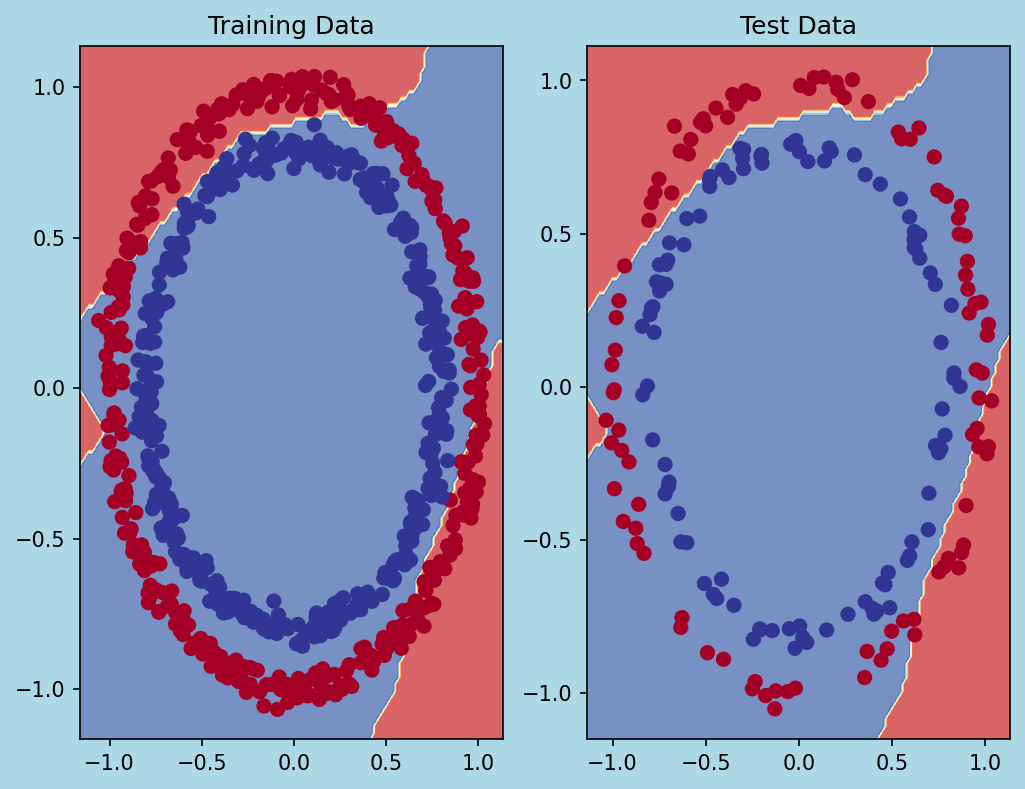

In [ ]:
plt.figure(figsize=(8,6), dpi=150, facecolor= 'lightblue')
plt.subplot(1,2,1)
plt.title('Training Data')
plot_decision_boundary(model_N1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test Data')
plot_decision_boundary(model_N1, X_test, y_test)

### **Replicate Activation Functions**

In [ ]:
# Relu
def relu(x):
  return torch.maximum(torch.tensor(0), x)

# Sigmoid
def sigmoid(x):
  return 1/(1 + torch.exp(-x))

# Linear

A = torch.arange(-10, 10, 0.5)


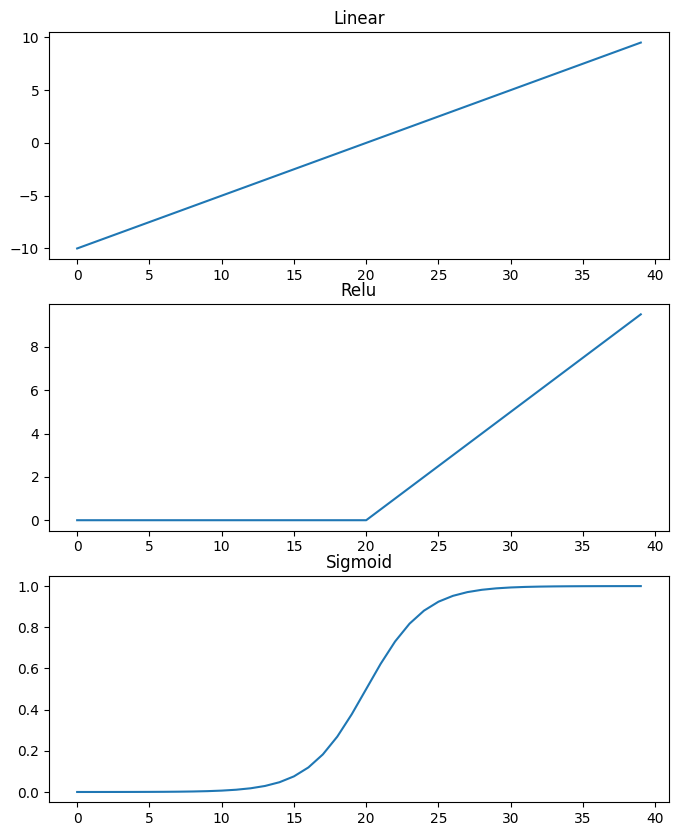

In [ ]:
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.title('Linear')
plt.plot(A)
plt.subplot(3,1,2)
plt.title('Relu')
plt.plot(relu(A))
plt.subplot(3,1,3)
plt.title('Sigmoid')
plt.plot(sigmoid(A))